<a href="https://colab.research.google.com/github/shifosss/JSC270-A3/blob/main/A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment Requirements
https://docs.google.com/document/d/1AsS61ItrAfdkvMi0GNaqak3_i0d8wOEa/edit?tab=t.0

## Setup

In [3]:
# All needed libraries are imported here
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Part 1

**A.** (4 pts) Suppose you can only generate pairs of uniform random numbers between 0 and 1 (ie. points within a unit square centered at (½, ½)).  

Describe a method to approximate 𝜋 by generating many pairs of these uniform random numbers.  Implement your method in your notebook to obtain an estimate of 𝜋.  

*Hint: Recalling the formula for the area of a circle might come in handy here.*

In [4]:
x = [np.array([1])] * 100
y = [np.array([1])] * 100
r = [np.array([1])] * 100
estimate = [0.0] * 100
np.random.seed(28)
for i in range(100):
    x[i] = np.random.uniform(0, 1, 1000000)
    y[i] = np.random.uniform(0, 1, 1000000)
    r[i] = (x[i] - 1/2) ** 2 + (y[i] - 1/2) ** 2
    estimate[i] = np.count_nonzero(r[i] <= 1/4) / 1000000 * 4

print("{:.7f}".format(np.mean(estimate)))

3.1415975


## Part 2

**A.** (3 pts) Run a simulation to compare the bias of the above two estimators for 2 in your notebook.  Specifically, consider sample sizes of n = 10, 25, 50, 100, 250, 500.  For each sample size, generate the n samples independently from a normal distribution with mean 2 and standard deviation 2 and compute both estimators.  Repeat this process 1000 times for each sample size.  With the 1000 estimates, compute the bias of both estimators for 2 for each sample size.


In [5]:
def calculate_sample_variance(sample):
    """
    Calculate the sample variance using the formula:
    (1/(n-1)) * sum((X_i - X_bar)^2)
    """
    n = len(sample)
    sample_mean = np.mean(sample)
    squared_deviations = (sample - sample_mean) ** 2
    variance = np.sum(squared_deviations) / (n - 1)
    return variance

def calculate_population_variance(sample):
    """
    Calculate the population variance using the formula:
    (1/n) * sum((X_i - X_bar)^2)
    """
    n = len(sample)
    sample_mean = np.mean(sample)
    squared_deviations = (sample - sample_mean) ** 2
    variance = np.sum(squared_deviations) / n
    return variance

size = [10, 25, 50, 100, 250, 500]
sample_mean = 2
sample_sd = 2
bias_1 = [0] * 6
bias_2 = [0] * 6
np.random.seed(28)
for s in size:
    for i in range(1000):
        sample = np.random.normal(sample_mean, sample_sd, size=(s, 1))
        estimate_1 = calculate_sample_variance(sample)
        estimate_2 = calculate_population_variance(sample)
        bias_1[size.index(s)] += estimate_1 - 4
        bias_2[size.index(s)] += estimate_2 - 4
    bias_1[size.index(s)] /= 1000.0
    bias_2[size.index(s)] /= 1000.0

pd.DataFrame({'Sample Variance': bias_1, 'Population Variance': bias_2}, index=size)

,Sample Variance,Population Variance
10,0.000563,-0.399493
25,0.029906,-0.131290
50,-0.026268,-0.105743
100,-0.002941,-0.042911
250,-0.003423,-0.019410
500,-0.006506,-0.014493


**B.** (2 pts) Make a plot of bias vs sample size for the two estimators.  What do you observe? Is this behavior expected?

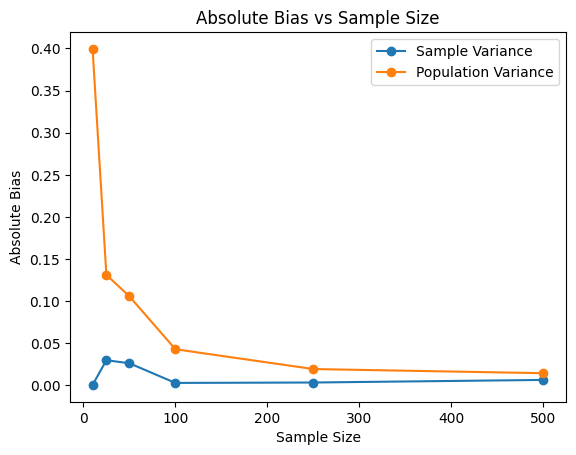

In [9]:
plt.plot(size, np.abs(bias_1), label='Sample Variance', marker='o')
plt.plot(size, np.abs(bias_2), label='Population Variance', marker='o')
plt.xlabel('Sample Size')
plt.ylabel('Absolute Bias')
plt.title('Absolute Bias vs Sample Size')
plt.legend()
plt.show()


## Part 4

**A.** (3 pts) Let’s run a simulation to investigate the behavior of the sample mean.  Consider sample sizes of n = 10, 25, 50, 100, 250, 500, 2000, 5000.  For each sample size, generate the n samples independently from an exponential distribution with a mean (or expected value) of 2.  Compute the empirical mean in each sample.  

Plot the value of the empirical mean vs the sample size with a horizontal line at 2.  What pattern do you observe?  Is the pattern what you would expect? Why or why not? Would you expect the same pattern if you simulated from an exponential distribution with a different mean?


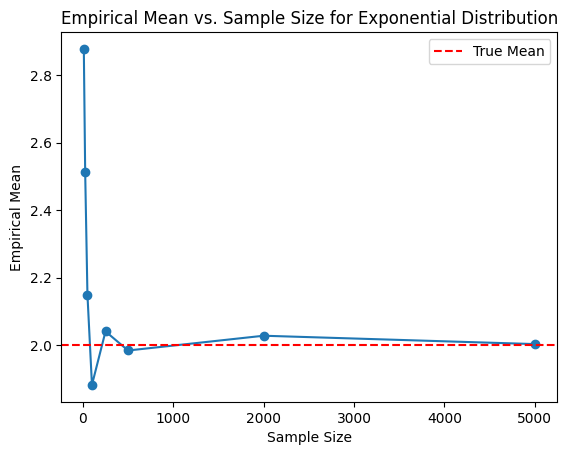

In [7]:
sample_sizes = [10, 25, 50, 100, 250, 500, 2000, 5000]
empirical_means = []
np.random.seed(28)
for n in sample_sizes:
  sample = np.random.exponential(scale=2, size=n)
  empirical_means.append(np.mean(sample))

plt.plot(sample_sizes, empirical_means, marker='o')
plt.axhline(y=2, color='r', linestyle='--', label='True Mean')
plt.xlabel('Sample Size')
plt.ylabel('Empirical Mean')
plt.title('Empirical Mean vs. Sample Size for Exponential Distribution')
plt.legend()
plt.show()


**B.** (3 pts) Again consider sample sizes of n = 10, 25, 50, 100, 250, 500, 2000, 5000.  For each sample size, generate the n samples independently from a standard Cauchy distribution (location and scale parameters equal to 0 and 1, respectively) and compute the empirical mean.  Repeat this process 1000 times for each sample size.

Make a histogram of the 1000 empirical means for each sample size.  What pattern do you observe?  Is the pattern what you would expect? Why or why not?


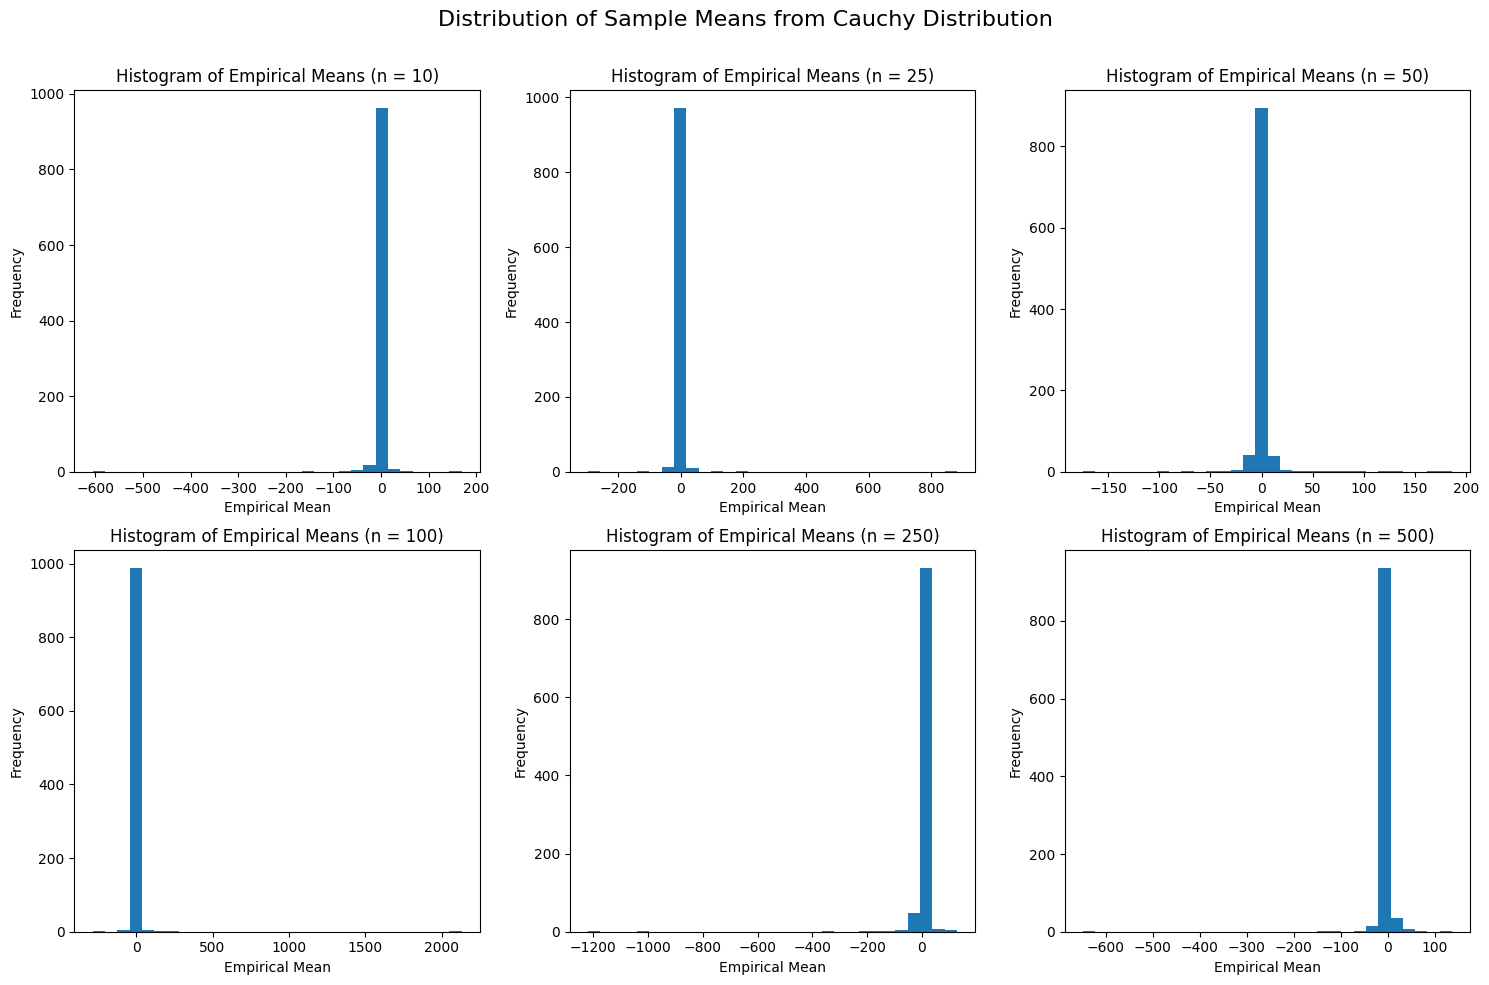

In [8]:
sample_sizes = [10, 25, 50, 100, 250, 500, 2000, 5000]
num_simulations = 1000

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

np.random.seed(28)
for i, n in enumerate(sample_sizes[:6]):
    empirical_means = []
    for _ in range(num_simulations):
        sample = np.random.standard_cauchy(n)
        empirical_means.append(np.mean(sample))

    axes[i].hist(empirical_means, bins=30)
    axes[i].set_title(f'Histogram of Empirical Means (n = {n})')
    axes[i].set_xlabel('Empirical Mean')
    axes[i].set_ylabel('Frequency')

fig.suptitle('Distribution of Sample Means from Cauchy Distribution', fontsize=16)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()
